# Tableau de corrélation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [27]:
frame = pd.read_csv("Data1_ImmuweanBIS.csv")
frame.head()

,ID,ID_litter,Size,litt_size,sex,group,IgGJ2,TPI,Died,Diarr,...,TRD47,TRD48,TRD49,TRD50,TRD51,TRD52,TRD53,TRD54,TRD55,TRD56
0,L2A,2,S,5,M,L,NaN,NaN,1,1,...,38.4,38.4,38.2,38.4,38.9,38.7,38.5,38.7,39.0,39.0
1,L2B,2,S,5,F,L,NaN,NaN,0,1,...,38.2,38.4,37.4,37.8,39.1,38.1,38.7,37.7,37.9,38.3
2,L2C,2,S,5,M,C,NaN,NaN,0,0,...,38.5,38.2,38.4,38.1,38.8,39.1,37.4,38.0,38.2,37.6
3,L2D,2,S,5,F,L,NaN,NaN,0,1,...,37.8,38.4,38.4,38.4,38.9,38.3,38.5,38.6,38.0,38.0
4,L2E,2,S,5,F,C,NaN,NaN,0,1,...,38.3,38.3,38.7,38.6,39.1,37.4,37.4,37.4,37.4,37.4


In [28]:
del frame['Age_D1']
del frame['AgeD2']
frame

,ID,ID_litter,Size,litt_size,sex,group,IgGJ2,TPI,Died,Diarr,...,TRD47,TRD48,TRD49,TRD50,TRD51,TRD52,TRD53,TRD54,TRD55,TRD56
0,L2A,2,S,5,M,L,NaN,NaN,1,1,...,38.4,38.4,38.2,38.4,38.9,38.7,38.5,38.7,39.0,39.0
1,L2B,2,S,5,F,L,NaN,NaN,0,1,...,38.2,38.4,37.4,37.8,39.1,38.1,38.7,37.7,37.9,38.3
2,L2C,2,S,5,M,C,NaN,NaN,0,0,...,38.5,38.2,38.4,38.1,38.8,39.1,37.4,38.0,38.2,37.6
3,L2D,2,S,5,F,L,NaN,NaN,0,1,...,37.8,38.4,38.4,38.4,38.9,38.3,38.5,38.6,38.0,38.0
4,L2E,2,S,5,F,C,NaN,NaN,0,1,...,38.3,38.3,38.7,38.6,39.1,37.4,37.4,37.4,37.4,37.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,L54A,54,M,8,M,C,0.73,0.0,0,0,...,38.3,37.9,38.3,38.8,38.7,38.9,38.5,37.8,38.5,38.4
163,L54C,54,M,8,F,L,NaN,NaN,0,0,...,38.8,38.8,37.9,38.1,38.4,38.9,38.2,38.9,38.5,38.1
164,L54G,54,M,8,M,C,4.70,1.0,0,0,...,38.7,38.4,36.8,38.1,38.2,38.9,38.8,38.6,38.2,38.3
165,L55F,55,S,7,M,C,4.84,1.0,0,0,...,38.5,38.0,38.3,38.4,38.5,38.4,38.4,38.9,38.9,38.1


In [29]:
frame['IgGJ2'].fillna(0, inplace = True)
frame['TPI'].fillna(0, inplace = True)
frame['sex'].fillna('ND', inplace = True)
frame['InfCroissPed'].fillna(0, inplace = True)
frame['InfCroiss7'].fillna(0, inplace = True)
frame['InfCroiss8'].fillna(0, inplace = True)
frame['Min1inflcr'].fillna(0, inplace = True)
frame

,ID,ID_litter,Size,litt_size,sex,group,IgGJ2,TPI,Died,Diarr,...,TRD47,TRD48,TRD49,TRD50,TRD51,TRD52,TRD53,TRD54,TRD55,TRD56
0,L2A,2,S,5,M,L,0.00,0.0,1,1,...,38.4,38.4,38.2,38.4,38.9,38.7,38.5,38.7,39.0,39.0
1,L2B,2,S,5,F,L,0.00,0.0,0,1,...,38.2,38.4,37.4,37.8,39.1,38.1,38.7,37.7,37.9,38.3
2,L2C,2,S,5,M,C,0.00,0.0,0,0,...,38.5,38.2,38.4,38.1,38.8,39.1,37.4,38.0,38.2,37.6
3,L2D,2,S,5,F,L,0.00,0.0,0,1,...,37.8,38.4,38.4,38.4,38.9,38.3,38.5,38.6,38.0,38.0
4,L2E,2,S,5,F,C,0.00,0.0,0,1,...,38.3,38.3,38.7,38.6,39.1,37.4,37.4,37.4,37.4,37.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,L54A,54,M,8,M,C,0.73,0.0,0,0,...,38.3,37.9,38.3,38.8,38.7,38.9,38.5,37.8,38.5,38.4
163,L54C,54,M,8,F,L,0.00,0.0,0,0,...,38.8,38.8,37.9,38.1,38.4,38.9,38.2,38.9,38.5,38.1
164,L54G,54,M,8,M,C,4.70,1.0,0,0,...,38.7,38.4,36.8,38.1,38.2,38.9,38.8,38.6,38.2,38.3
165,L55F,55,S,7,M,C,4.84,1.0,0,0,...,38.5,38.0,38.3,38.4,38.5,38.4,38.4,38.9,38.9,38.1


In [30]:
del frame['ID_litter']
del frame['InfCroiss4']
del frame['InfCroiss5']
del frame['InfCroiss6']
del frame['InfCroiss7']
del frame['InfCroiss8']

## Tableau de corrélation sur toute les données

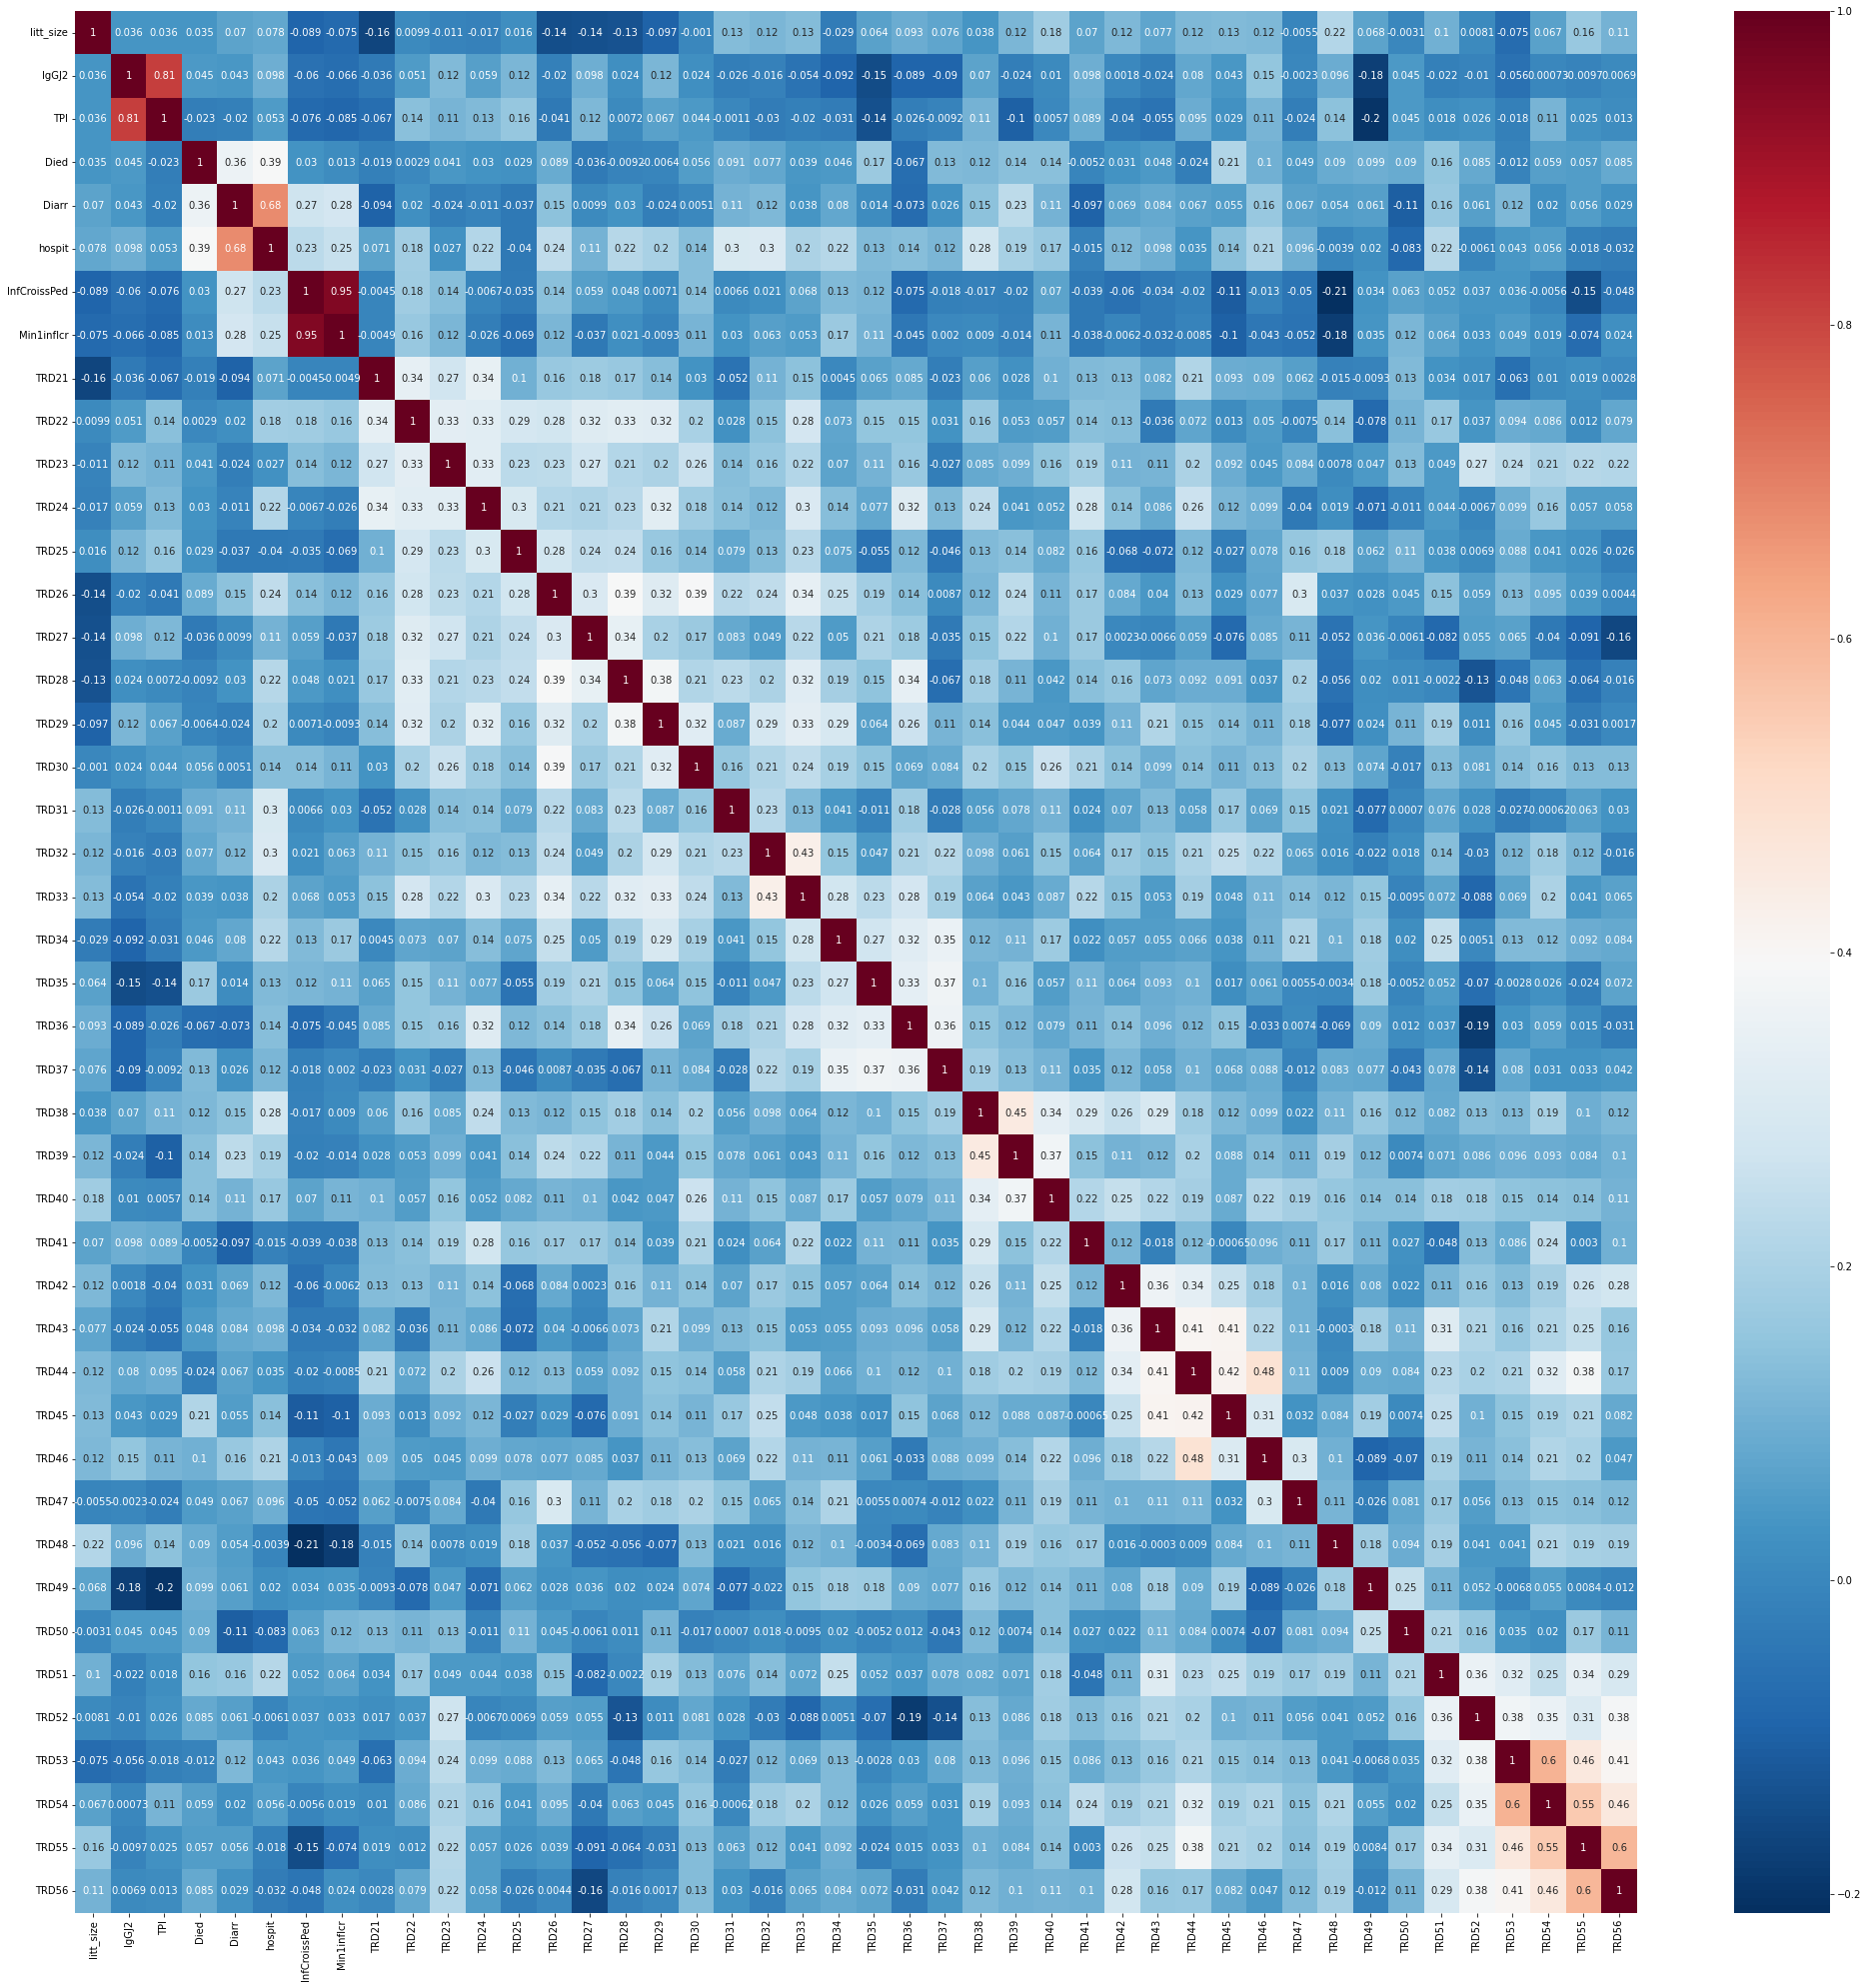

In [32]:
from sklearn.feature_selection import SelectKBest
import seaborn as sns
plt.figure(figsize=(35,35))
cor = frame.corr()
sns.heatmap(cor, annot=True, cmap='RdBu_r')
plt.show()

Les températures n'aide pas à trouver de corrélatiion avec des états de santé des chiots et ne corrèle qu'entre elles. Cependant pour les températures des jours 31, 32 et 38 on voit une corrélation assez élevée avec l'hospitalisation. 

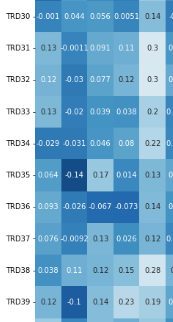

Quant au début du tableau on voit les mêmes corrélation que ce qu'avait pu trouver l'autre partie du groupe le premier semestre. Une corrélation énorme entre la diarrhée, l'hospitalisation et la mort des chiots.
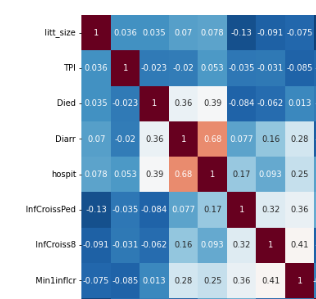
